In [19]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [9]:
class spectra:
    def __init__(self, filename):
        self.chan, self.energy, self.count= np.loadtxt('spectra/Background_16_10_23_Mon_14_50_edited.csv',delimiter = ',',skiprows=3,unpack = True)

chan_bg_spec,E_bg_spec,C_bg_spec = np.loadtxt('spectra/Background_16_10_23_Mon_14_50.csv',delimiter = ',',skiprows=7,unpack = True)
peaks, _ =signal.find_peaks(C_bg_spec)

In [83]:
def chi2_prob(fit,data,err,df):
    '''This function calculates chi2 probability for given 
       fit array, data array,err and degrees of freedom 
       Inputs: fit  - array of fitted values
               data - array of original data
               err  - error 
               df   - degree of freedom
       Outputs: chi2 probability, 
       the probability of obtaining a value of minimized chi2 
       equal to the fit value or higher, given df'''
    norm_resid = (fit -data)/err #normalized residual
    chi2 = np.sum(norm_resid**2) #chi-square
    chi2_p = 1-stats.chi2.cdf(chi2,df) #chi2 probability =  1-cumulative distribution function
    return chi2_p

In [20]:
bg = pd.read_csv('spectra/Background_16_10_23_Mon_14_50.csv',delimiter = ',')

In [ ]:
pk_bg = np.loadtxt('spectra/Background_16_10_23_Mon_14_50.csv',delimiter = ',',skiprows=7,unpack = True)

FWHM of Gaussian = $2\sqrt{2\ln{2}}\sigma$, where $\sigma$ is standard deviation. \
Error in centroid of Gaussian can be given by standard error on mean, which is $\sigma/\sqrt{n}$. \
$n$ is the number of samples, i.e. total no. of counts under the peak in this  case

In [106]:
peak_1 = pd.read_csv('peaks/peaks_Sample1_30_10_23_Mon_09_22.CSV',delimiter = ',')
centroid_1, ref_1, fwhm_1, peak_count_1= peak_1[['Centroid',' Photopeak_Energy',' FWHM',' ROI_Total']][1:].dropna().to_numpy(dtype = float).transpose()
centroid_1_err = fwhm_1/2/np.sqrt(2*np.log(2)*peak_count_1) #centroid error

In [78]:
energy, count = np.loadtxt('spectra/Sample1_24_10_23_Mon_15_27.csv',delimiter = ',', skiprows = 3,unpack = True)

In [120]:
#convert peak energy to channel number (fraction of channel number)
chan = np.arange(1, len(energy)+1) #channel number
popt, pcov = np.polyfit(energy,chan,1,cov = True)
energy_to_chan = np.poly1d(popt)
perr = np.sqrt(np.diag(pcov))

Text(0.5, 0, 'Energy/keV')

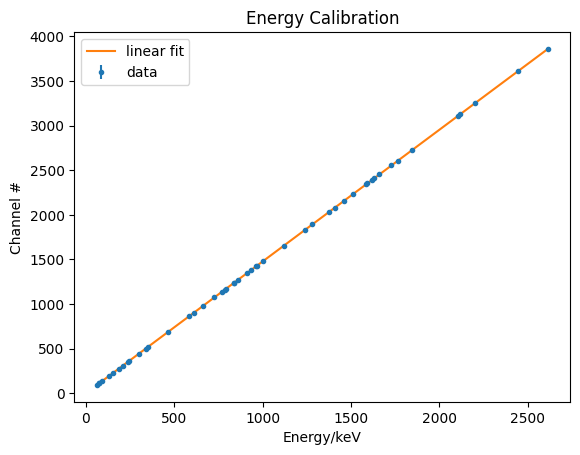

In [118]:
x = ref_1
y = energy_to_chan(centroid_1)
popt_peak, pcov_peak = np.polyfit(x,y,1,cov = True) #energy callibration using peak
perr_peak = np.sqrt(np.diag(pcov_peak))
peak_fit = np.poly1d(popt_peak)
y_err = popt_peak[0]*centroid_1_err
#errorbars are too small to be displayed
plt.title('Energy Calibration')
plt.errorbar(x,y,yerr= y_err, fmt = '.',label = 'data')
plt.plot(x,peak_fit(x),label = 'linear fit')
plt.legend()
plt.ylabel('Channel #')
plt.xlabel('Energy/keV')


In [121]:
print('Linear fit (channel to energy) using peak energy:', popt_peak)
print('Original linear fit (channel to energy) :', popt)
print('Respective errors:')
print(perr)
print(perr_peak)

Linear fit (channel to energy) using peak energy: [1.47556888 1.48160196]
Original linear fit (channel to energy) : [1.47521616 0.85363498]
Respective errors:
[3.01835992e-06 4.83791724e-03]
[6.01114777e-05 7.33608072e-02]


Text(0, 0.5, 'Reference Peak Energy-Peak Centroid/keV')

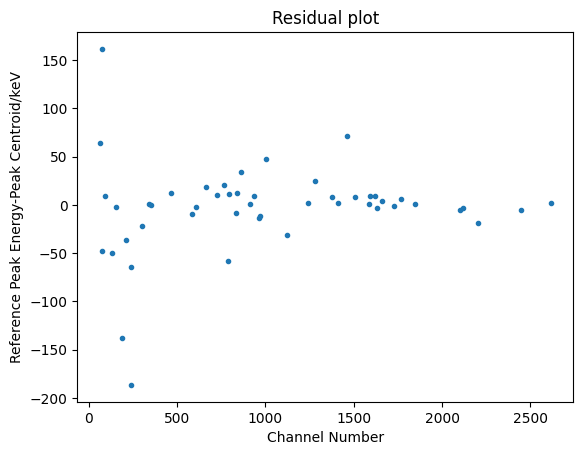

In [116]:
plt.figure()
plt.title('Residual plot')
plt.plot(x,(y-peak_fit(x))/y_err,'.')
plt.xlabel('Channel Number')
plt.ylabel('Reference Peak Energy-Peak Centroid/keV')

In [90]:
chi2_prob(chan_to_energy(x),ref_1,0.2,len(x)-2)

0.5617155296299734

In [69]:
resid = y-chan_to_energy(x)
centroid_1[resid>2]

array([ 209.63, 1631.38])